In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors





from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import csv
from joblib import Parallel, delayed
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
from scipy.spatial.distance import cdist


100%|██████████| 55448/55448 [36:28<00:00, 25.34it/s] 


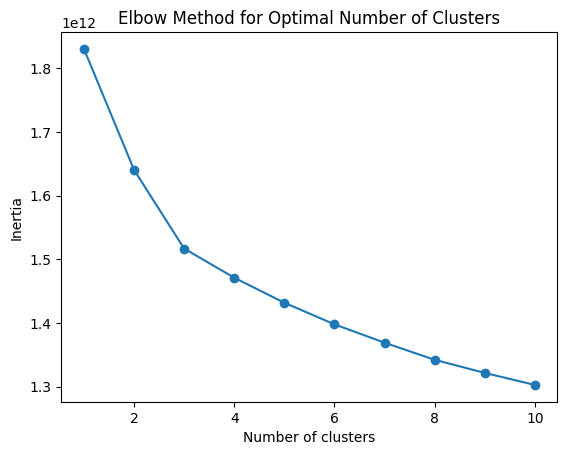

100%|██████████| 55440/55440 [00:49<00:00, 1121.43it/s]


Training histograms and labels saved to train.csv


In [27]:
# def load_images_and_labels(root_dir):
#     images = []
#     labels = []
#     image_paths = []
#     valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.JPG', '.JPEG', '.PNG', '.BMP')
    
#     for subdir, dirs, files in os.walk(root_dir):
#         for file in files:
#             if any(file.endswith(ext) for ext in valid_extensions):
#                 img_path = os.path.join(subdir, file)
#                 label = os.path.basename(os.path.dirname(img_path))
#                 images.append(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE))
#                 labels.append(label)
#                 image_paths.append(img_path)
    
#     return images, labels, image_paths

# # Feature extraction using SIFT
# def extract_sift_features(image):
#     sift = cv2.SIFT_create()
#     keypoints, descriptors = sift.detectAndCompute(image, None)
#     return descriptors

# # Elbow method to find optimal number of clusters
# def elbow_method(all_descriptors, max_clusters=10):  # Updated to 10 clusters for testing
#     inertias = []
#     for i in range(1, max_clusters + 1):
#         kmeans = KMeans(n_clusters=i, n_init=10)
#         kmeans.fit(np.vstack(all_descriptors))
#         inertias.append(kmeans.inertia_)
#     return inertias

# # Plot elbow curve
# def plot_elbow_curve(inertias):
#     plt.plot(range(1, len(inertias) + 1), inertias, marker='o')
#     plt.xlabel('Number of clusters')
#     plt.ylabel('Inertia')
#     plt.title('Elbow Method for Optimal Number of Clusters')
#     plt.show()

# # Create Bag of Words model
# def create_bow_model(all_descriptors, num_clusters=10):  # Set to 48 clusters
#     kmeans = KMeans(n_clusters=num_clusters, n_init=10)  # Updated n_init to 10 for testing
#     kmeans.fit(np.vstack(all_descriptors))
#     visual_words = kmeans.cluster_centers_
#     return kmeans, visual_words

# # Generate histograms for images based on visual words
# def generate_histograms(kmeans, descriptors, num_clusters=10):  # Set to 48 clusters
#     if descriptors is not None:
#         histogram = np.zeros(num_clusters)
#         clusters = kmeans.predict(descriptors)
#         for cluster in clusters:
#             histogram[cluster] += 1
#         return histogram
#     else:
#         return np.zeros(num_clusters)

# # Save histograms and labels to CSV
# def save_histograms_to_csv(image_paths, labels, histograms, csv_file):
#     header = ["image_path", "label"] + [f"feature_{i}" for i in range(len(histograms[0]))]
#     with open(csv_file, mode='w', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(header)
#         for img_path, label, hist in zip(image_paths, labels, histograms):
#             row = [img_path, label] + hist.tolist()
#             writer.writerow(row)

# # Main function
# def main(train_dir, train_csv):
#     train_images, train_labels, train_image_paths = load_images_and_labels(train_dir)

#     # Extract SIFT features for training data in parallel
#     train_descriptors = Parallel(n_jobs=-1, backend="threading")(delayed(extract_sift_features)(img) for img in tqdm(train_images))

#     # Filter out None descriptors
#     train_descriptors = [desc for desc in train_descriptors if desc is not None]

#     # Elbow method to find optimal number of clusters
#     inertias = elbow_method(train_descriptors, max_clusters=10)  # Updated max_clusters to 10 for testing
#     plot_elbow_curve(inertias)

#     # Use a fixed number of clusters for features
#     optimal_clusters = 10  

#     # Create BoW model using training data
#     kmeans, visual_words = create_bow_model(train_descriptors, num_clusters=optimal_clusters)

#     # Generate histograms for training data in parallel
#     train_histograms = Parallel(n_jobs=-1, backend="threading")(delayed(generate_histograms)(kmeans, desc, num_clusters=optimal_clusters) for desc in tqdm(train_descriptors))

#     # Save training histograms and labels to CSV
#     save_histograms_to_csv(train_image_paths, train_labels, train_histograms, train_csv)
#     print(f"Training histograms and labels saved to {train_csv}")

# if __name__ == "__main__":
#     main("./Plant_leave_diseases_dataset_without_augmentation", "train.csv")


In [28]:
df = pd.read_csv("train.csv")
label_counts = df['label'].value_counts()
print(label_counts)

label
Orange___Haunglongbing_(Citrus_greening)         5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus           5349
Soybean___healthy                                5090
Peach___Bacterial_spot                           2297
Tomato___Bacterial_spot                          2127
Tomato___Late_blight                             1909
Squash___Powdery_mildew                          1835
Tomato___Septoria_leaf_spot                      1771
Tomato___Spider_mites Two-spotted_spider_mite    1676
Apple___healthy                                  1645
Tomato___healthy                                 1591
Blueberry___healthy                              1502
Pepper,_bell___healthy                           1478
Tomato___Target_Spot                             1404
Grape___Esca_(Black_Measles)                     1383
Corn___Common_rust                               1192
Grape___Black_rot                                1180
Corn___healthy                                   1162
Background_without_lea

In [ ]:
def load_images_and_labels(root_dir):
    images = []
    labels = []
    image_paths = []
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.JPG', '.JPEG', '.PNG', '.BMP')
    
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if any(file.endswith(ext) for ext in valid_extensions):
                img_path = os.path.join(subdir, file)
                label = os.path.basename(os.path.dirname(img_path))
                images.append(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE))
                labels.append(label)
                image_paths.append(img_path)
    
    return images, labels, image_paths

def extract_sift_features(image_path):
    gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    return keypoints, descriptors

def build_vocabulary(descriptors_list, vocab_size):
    all_descriptors = np.vstack(descriptors_list)
    kmeans = KMeans(n_clusters=vocab_size, random_state=0)
    kmeans.fit(all_descriptors)
    return kmeans.cluster_centers_

def create_bow_histogram(descriptors, vocabulary):
    nbrs = NearestNeighbors(n_neighbors=1).fit(vocabulary)
    distances, indices = nbrs.kneighbors(descriptors)
    bow_histogram, _ = np.histogram(indices, bins=np.arange(len(vocabulary) + 1))
    return bow_histogram

def save_histograms_to_csv(image_paths, labels, histograms, csv_file):
    header = ["image_path", "label"] + [f"feature_{i}" for i in range(len(histograms[0]))]
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
        for img_path, label, hist in zip(image_paths, labels, histograms):
            row = [img_path, label] + hist.tolist()
            writer.writerow(row)

if __name__ == "__main__":
    root_dir = "./Plant_leave_diseases_dataset_without_augmentation"
    vocab_size = 400  # You can adjust the vocabulary size

    images, labels, image_paths = load_images_and_labels(root_dir)

    # Extract SIFT features
    descriptors_list = []
    for img_path in image_paths:
        _, descriptors = extract_sift_features(img_path)
        if descriptors is not None:
            descriptors_list.append(descriptors)

    vocabulary = build_vocabulary(descriptors_list, vocab_size)

    histograms = []
    for img_path in image_paths:
        _, descriptors = extract_sift_features(img_path)
        if descriptors is not None:
            hist = create_bow_histogram(descriptors, vocabulary)
            histograms.append(hist)

    csv_file = 'histograms400.csv'
    save_histograms_to_csv(image_paths, labels, histograms, csv_file)


In [5]:
df = pd.read_csv("histograms400.csv")
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_data.drop(columns=["image_path", "label"])
y_train = train_data["label"]
X_test = test_data.drop(columns=["image_path", "label"])
y_test = test_data["label"]

combined_labels = pd.concat([y_train, y_test], axis=0)

label_encoder = LabelEncoder()
y_combined_encoded = label_encoder.fit_transform(combined_labels)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', C=1000, gamma='scale')
svm_model.fit(X_train_scaled, y_train_resampled)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.774440836940837
Precision: 0.7707505493594651
Recall: 0.774440836940837
F1 Score: 0.7712440433638325


# k fold

In [1]:
df = pd.read_csv("histograms400.csv")
X = df.drop(columns=["image_path", "label"])
y = df["label"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_model = SVC(kernel='rbf', C=1000, gamma='scale')

ros = RandomOverSampler(random_state=42)

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_scaled, y_encoded):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
    
    svm_model.fit(X_train_resampled, y_train_resampled)
    
    y_pred = svm_model.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

print(f"Mean Accuracy: {sum(accuracy_scores) / len(accuracy_scores)}")
print(f"Mean Precision: {sum(precision_scores) / len(precision_scores)}")
print(f"Mean Recall: {sum(recall_scores) / len(recall_scores)}")
print(f"Mean F1 Score: {sum(f1_scores) / len(f1_scores)}")


Mean Accuracy: 0.7701479076479076
Mean Precision: 0.7670136402064905
Mean Recall: 0.7701479076479077
Mean F1 Score: 0.7670561100673192


# try with augmentation dataset

In [2]:
def load_images_and_labels(root_dir):
    images = []
    labels = []
    image_paths = []
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.JPG', '.JPEG', '.PNG', '.BMP')
    
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if any(file.endswith(ext) for ext in valid_extensions):
                img_path = os.path.join(subdir, file)
                label = os.path.basename(os.path.dirname(img_path))
                images.append(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE))
                labels.append(label)
                image_paths.append(img_path)
    
    return images, labels, image_paths

def extract_sift_features(image_path):
    # Read the image
    gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    return keypoints, descriptors

def build_vocabulary(descriptors_list, vocab_size):
    all_descriptors = np.vstack(descriptors_list)
    kmeans = KMeans(n_clusters=vocab_size, random_state=0)
    kmeans.fit(all_descriptors)
    return kmeans.cluster_centers_

def create_bow_histogram(descriptors, vocabulary):
    nbrs = NearestNeighbors(n_neighbors=1).fit(vocabulary)
    distances, indices = nbrs.kneighbors(descriptors)
    bow_histogram, _ = np.histogram(indices, bins=np.arange(len(vocabulary) + 1))
    return bow_histogram

# Save histograms and labels to CSV
def save_histograms_to_csv(image_paths, labels, histograms, csv_file):
    header = ["image_path", "label"] + [f"feature_{i}" for i in range(len(histograms[0]))]
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
        for img_path, label, hist in zip(image_paths, labels, histograms):
            row = [img_path, label] + hist.tolist()
            writer.writerow(row)

# Main workflow
if __name__ == "__main__":
    root_dir = "./Plant_leave_diseases_dataset_with_augmentation"
    vocab_size = 300  # You can adjust the vocabulary size

    images, labels, image_paths = load_images_and_labels(root_dir)

    # Extract SIFT features
    descriptors_list = []
    for img_path in image_paths:
        _, descriptors = extract_sift_features(img_path)
        if descriptors is not None:
            descriptors_list.append(descriptors)

    # Build vocabulary
    vocabulary = build_vocabulary(descriptors_list, vocab_size)

    # Create BoW histograms
    histograms = []
    for img_path in image_paths:
        _, descriptors = extract_sift_features(img_path)
        if descriptors is not None:
            hist = create_bow_histogram(descriptors, vocabulary)
            histograms.append(hist)

    csv_file = 'histograms_augmented_300.csv'
    save_histograms_to_csv(image_paths, labels, histograms, csv_file)
#173.41

In [1]:
df = pd.read_csv("histograms_augmented_300.csv")
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_data.drop(columns=["image_path", "label"])
y_train = train_data["label"]
X_test = test_data.drop(columns=["image_path", "label"])
y_test = test_data["label"]

combined_labels = pd.concat([y_train, y_test], axis=0)

label_encoder = LabelEncoder()
y_combined_encoded = label_encoder.fit_transform(combined_labels)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', C=1000, gamma='scale')
svm_model.fit(X_train_scaled, y_train_resampled)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.7805790500975928
Precision: 0.7759581396053845
Recall: 0.7805790500975928
F1 Score: 0.7776204014372033
